Assignment: Predicting Sales from Advertising Spend.Problem Statement:
HINA Inc. is a large FMCG company that is streamlining its marketing budget. This involves taking stock of all its marketing strategies. This, in turn, means re-assessing the effectiveness of its existing spend on various marketing channels. As a marketing data analyst, you need to figure out if spending money on TV advertising campaigns results in a direct increase in sales. In other words, you need to find out if the TV advertising spend and the sales figures share a linear relationship and how strong that relationship is.Data: You are provided with historical advertising data – weekly sales and spend on each channel – for almost the 4 previous years.Assuming an alpha value of 0.05 or 5%, your analysis should state clearly if there is significant evidence to show that the TV advertising campaigns have a relationship with the sales.
FURTHER WORK: Perform the same analysis/operations for the Radio and Newspaper campaigns and state resulting feedback.


In [86]:
import pandas as pd
file = pd.read_csv("advertising.csv")

In [87]:
file

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [88]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


CONCLUSION: there are no null values we don't need to clean

In [89]:
file.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [109]:
new_file=file.insert(0, 'week_nr', range(1, 1 + len(file)))

ValueError: cannot insert week_nr, already exists

In [110]:
new_file= file
new_file

,week_nr,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,12.0
3,4,151.5,41.3,58.5,16.5
4,5,180.8,10.8,58.4,17.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,14.0
197,198,177.0,9.3,6.4,14.8
198,199,283.6,42.0,66.2,25.5


By edding a column week_nr we can se changes during the period

In [ ]:
#defining attributes for easier handling
file_attributes =file[['TV', 'Radio', 'Newspaper', 'Sales']]

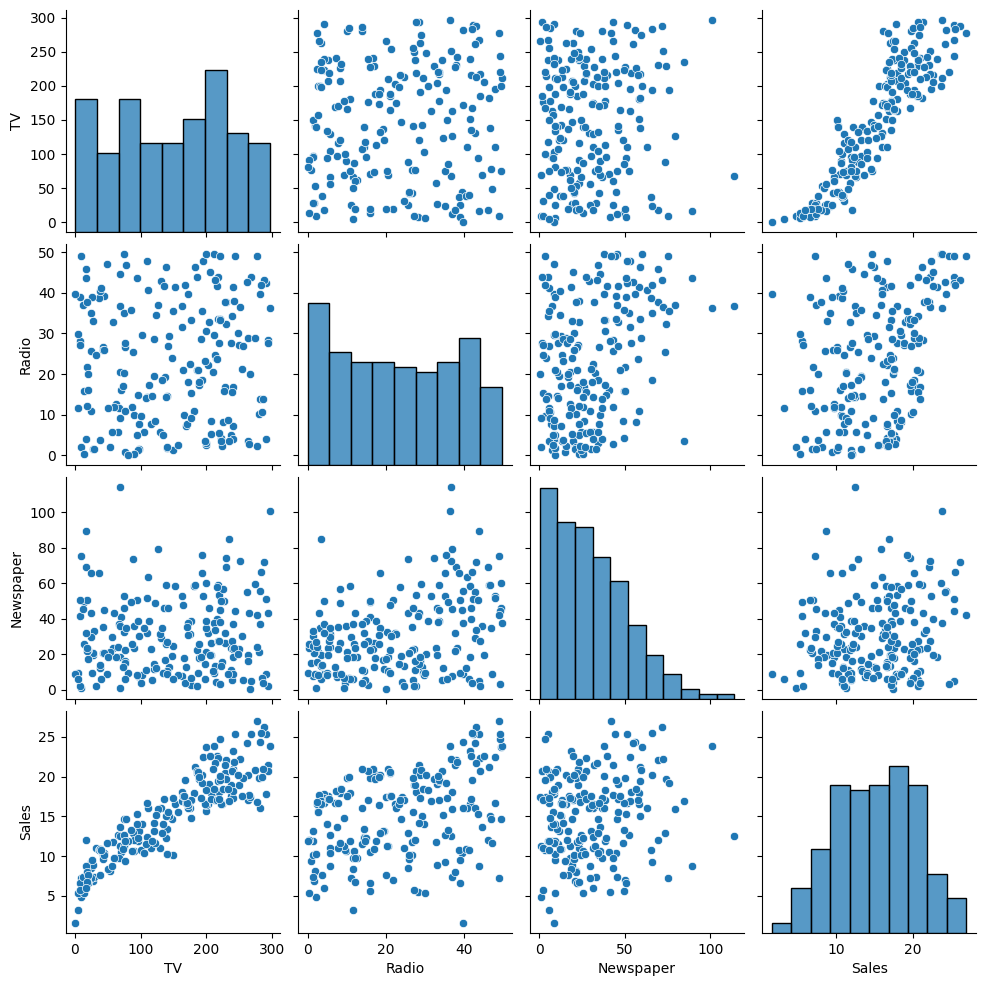

In [ ]:
# relationships between two variables
import seaborn as sns
sns.pairplot(file_attributes)


CONCLUSION:
we can assume that correlations between different variables and Sales are positive and that TV and Sales has stron correlation but we will compute correlation and add a trendline for each features

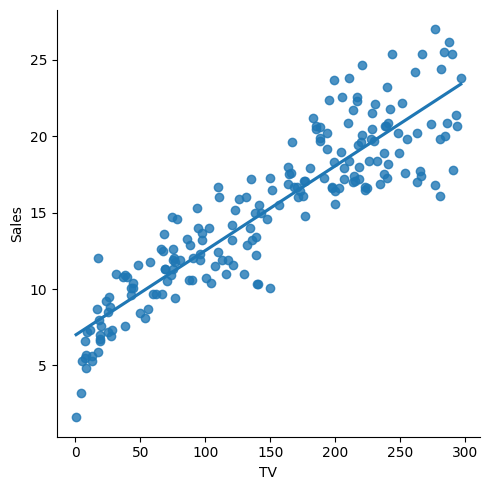

0.9012079133023306

In [ ]:
import matplotlib.pyplot as plt
sns.lmplot(x='TV', y='Sales', data=file, ci=None)
plt.show()
file['TV'].corr(file['Sales'])

CONCLUSION:
The extent of interdependence between spending money on TV advertising campaigns is 0,9 (relationship is very strong) and we can assume that spending money on TV advertising campaigns results in a direct increase in sales ->positive very strong relationship

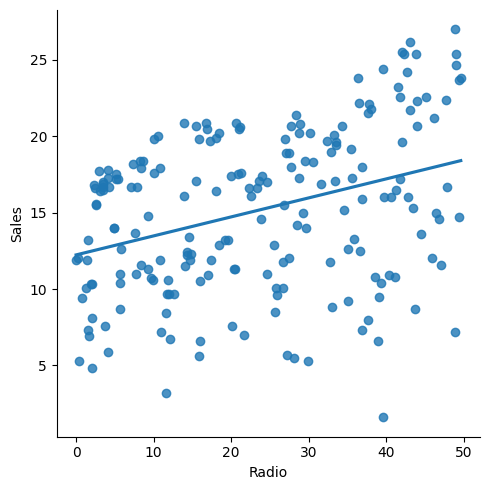

0.3496310970076693

In [ ]:
import matplotlib.pyplot as plt
sns.lmplot(x='Radio', y='Sales', data=file, ci=None)
plt.show()
file['Radio'].corr(file['Sales'])

CONCLUSION:
The extent of interdependence between spending money on Radio advertising campaigns is almost 0,35 (relationship is between weak and moderate) and we can assume that spending money on Radio advertising campaigns results in a weak increase in sales ->positive weak relationship

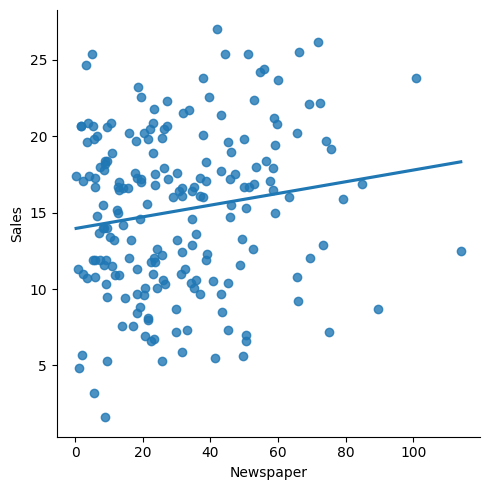

0.15796002615492621

In [ ]:
import matplotlib.pyplot as plt
sns.lmplot(x='Newspaper', y='Sales', data=file, ci=None)
plt.show()
file['Newspaper'].corr(file['Sales'])

CONCLUSION:
The extent of interdependence between spending money on Newspaper advertising campaigns is almost 0,16 (relationship is weak) and we can assume that spending money on Newspaper advertising campaigns results in a direct weak increase in sales ->positive very weak relationship

In [ ]:
from spicy import stats
pearson_coef, p_value = stats.pearsonr(file['TV'], file['Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  


The Pearson Correlation Coefficient is 0.9012079133023309  with a P-value of P = 7.927911625320818e-74


CONCLUSION:
p-value is < 0.001, there is a strong evidence that the correlation between TV and Sales is statistically significant!

In [ ]:
from spicy import stats
pearson_coef, p_value = stats.pearsonr(file['Radio'], file['Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.3496310970076693  with a P-value of P = 3.882892364494171e-07


CONCLUSION:
p-value is < 0.001, there is a strong evidence that the correlation between Radio and Sales is statistically significant, although the linear relationship is weak.

In [ ]:
from spicy import stats
pearson_coef, p_value = stats.pearsonr(file['Newspaper'], file['Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.1579600261549263  with a P-value of P = 0.025487444306997908


CONCLUSION:
p-value is <0.05, there is a moderate evidence that the correlation between Nowspaper and Sales is statistically significant, although the linear relationship is really weak.

In [194]:
from spicy import stats
pearson_coef, p_value = stats.pearsonr(file['TV'], file['Radio'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.05480866446583013  with a P-value of P = 0.4408060637884513


CONCLUSION:
p-value is >0.1, there is no evidence that the correlation between TV and Radio is statistically significant, the Correlation Coefficient shows that there is no relationship

In [195]:
from spicy import stats
pearson_coef, p_value = stats.pearsonr(file['TV'], file['Newspaper'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.05664787496505707  with a P-value of P = 0.4256017578819871


CONCLUSION:
p-value is >0.1, there is no evidence that the correlation between TV and Newspaper is statistically significant, the Correlation Coefficient shows that there is no relationship. 

In [196]:
from spicy import stats
pearson_coef, p_value = stats.pearsonr(file['Radio'], file['Newspaper'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.3541037507611754  with a P-value of P = 2.6888350787191817e-07


CONCLUSION:
p-value is >0.1, there is no evidence that the correlation between TV and Newspaper is statistically significant, even the Correlation Coefficient shows that there is weak relationship. 

# Changes during the period

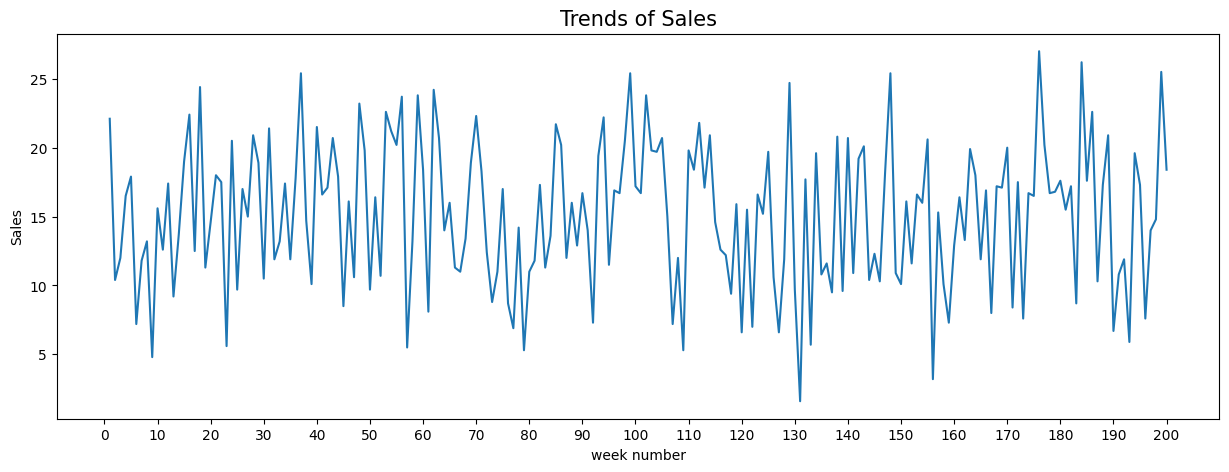

In [190]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(file['week_nr'],file['Sales'])
plt.title("Trends of Sales",fontdict = {'fontsize' : 15})
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))

plt.xlabel('week number')
plt.ylabel('Sales')
plt.show()

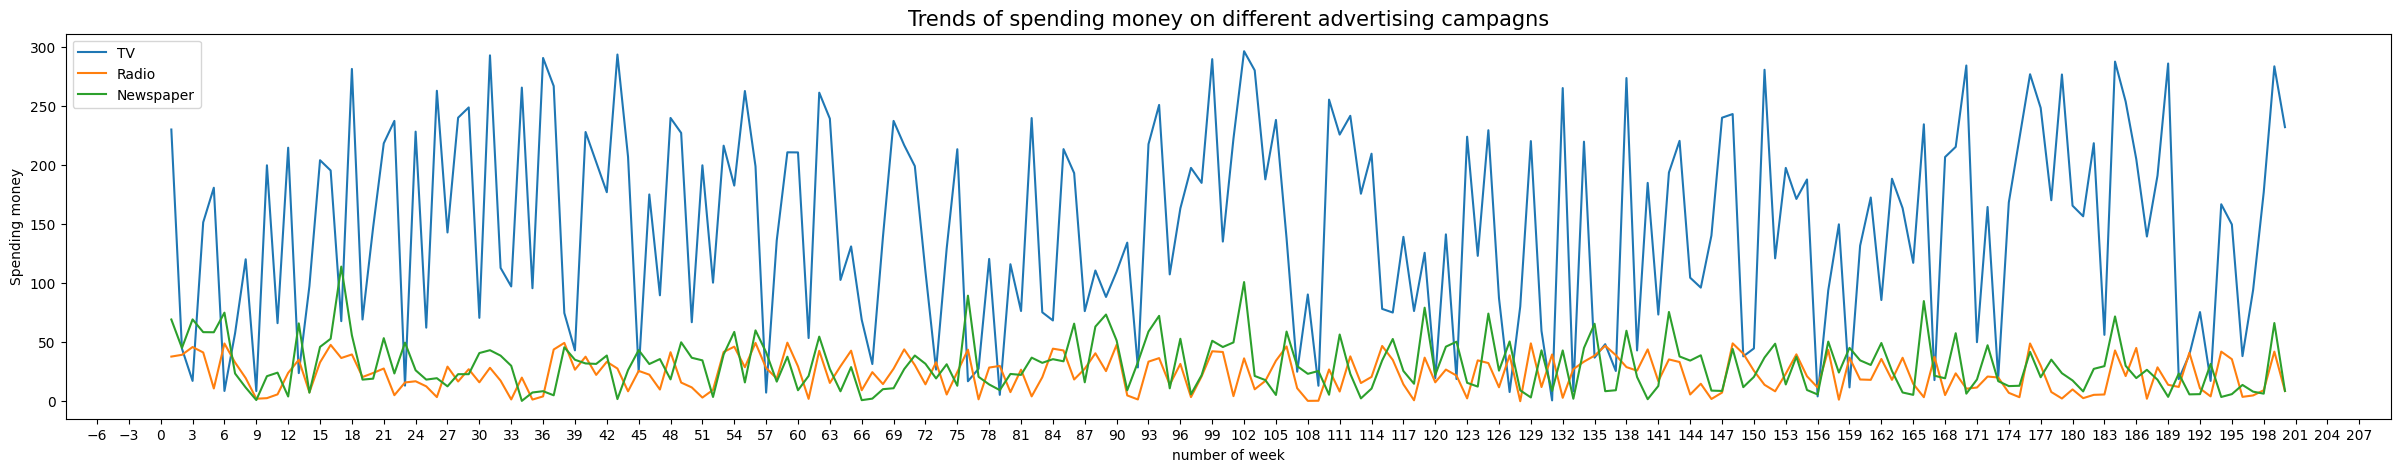

In [191]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,5))
plt.plot(file['week_nr'], file['TV'], label='TV' )
plt.plot(file['week_nr'], file['Radio'], label='Radio' )
plt.plot(file['week_nr'], file['Newspaper'], label='Newspaper' )
plt.title("Trends of spending money on different advertising campagns",fontdict = {'fontsize' : 15})
plt.xlabel('number of week')
plt.ylabel('Spending money')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
plt.legend()
plt.show()